In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
# Part II
# Q6

seed = np.random.randint(0, 100)
np.random.seed(seed)

def random_h(N):
    # N is the num of sampling 
    x = np.random.rand(N,2)

    y = np.random.randint(0,2,N)
    
    return x,y

def K_NN_Algorithm(X, Y, Test, k=3):
    # stored predicted labels
    prediction = []
    # iterate over test
    for test in Test:
        # distances
        distances = np.sqrt(np.sum((X - test) ** 2, axis=1))
        # get index of neighbors
        nearest_point = np.argsort(distances)[:k]
        # get labels 
        nearest_labels = Y[nearest_point]
        # find the most occurence labels
        # unique, counts = np.unique(nearest_labels, return_counts=True)
        # majority = unique[np.argmax(counts)]
        # prediction.append(majority)
        mean_label = np.mean(nearest_labels[:k])

        if mean_label > 0.5:
            majority = 1
        elif mean_label < 0.5:
            majority = 0
        else:
            majority = np.random.randint(0,2)
        prediction.append(majority)
        
    return np.array(prediction)



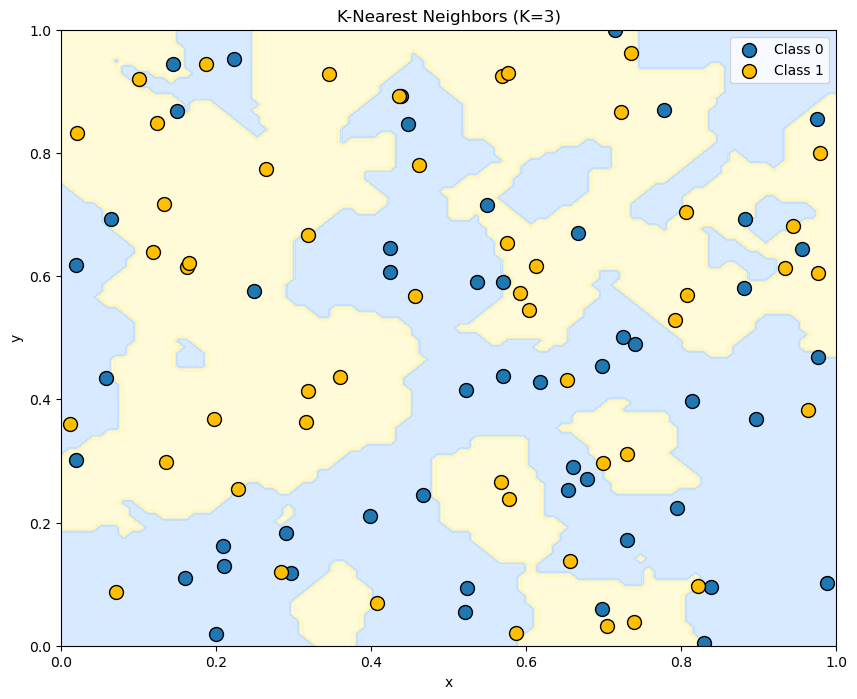

In [3]:
# Visualization
np.random.seed(0)
X_train, y_train = random_h(100)

# visualization grid
x_min, x_max = 0, 1
y_min, y_max = 0, 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
# turn the grid points as the text points
X_test_grid = np.c_[xx.ravel(), yy.ravel()] # ravel() flat the data point, in this case 100*100
# turn the grid points as boundary
y_pred_grid = K_NN_Algorithm(X_train, y_train, X_test_grid, k=3).reshape(xx.shape)

# plotting
plt.figure(figsize=(10, 8))
cmap_background = ListedColormap(['#B3D7FF', '#FFF6B3'])
cmap_points = ListedColormap(['#1F77B4', '#FFBF00'])

plt.contourf(xx, yy, y_pred_grid, cmap=cmap_background, alpha=0.5)


plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], 
            color='#1F77B4', edgecolor='k', s=100, label="Class 0")
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], 
            color='#FFBF00', edgecolor='k', s=100, label="Class 1")

plt.title("K-Nearest Neighbors (K=3)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
#plt.savefig('q6.png')
plt.show()

In [ ]:
# Q7 
# def pH(X, Y, N):
def p_h_distribution(X, Y, N, K):
    X_p_h_dist = np.random.rand(N, 2) # sample x uniformly at random 
    Y_p_h_dist = [] # y depends on flip coin
    # generate n centers according to the probability
    for i in range(N):
        coin_flip = np.random.choice([0, 1], p=[0.2, 0.8]) # 0: tail, 1: head
        if coin_flip == 0:
            Y_p_h_dist.append(np.random.randint(0, 2)) # tail: random [0,1]
        else:
            Y_p_h_dist.append(K_NN_Algorithm(X, Y, X_p_h_dist[i].reshape(1, -1), K).item())

    return X_p_h_dist, np.array(Y_p_h_dist)

k_values = range(1, 50)
generalization_errors = []
# Protocal A
for k in k_values:
    errors = []
    for _ in range(100):  # 100 runs
        # Generate training and test sets
        x, y = random_h(100)
        x_train, y_train = p_h_distribution(x, y, 4000, 3)
        x_test, y_test = p_h_distribution(x, y, 1000, 3)
        # Predict labels for the test set using k-NN
        y_pred = K_NN_Algorithm(x_train, y_train, x_test, k)
        
        # Calculate generalization error (zero-one loss)
        error = np.mean(y_pred != y_test)  # Proportion of misclassified points
        errors.append(error)
    
    # Average generalization error for current k
    generalization_errors.append(np.mean(errors))


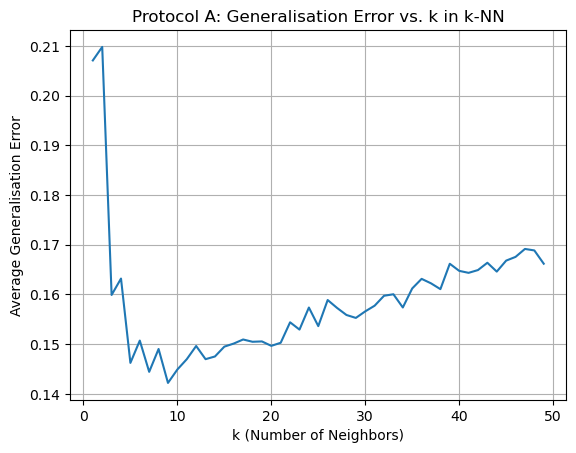

In [6]:

# Plot the results
plt.figure()
plt.plot(k_values, generalization_errors)
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Average Generalisation Error")
plt.title("Protocol A: Generalisation Error vs. k in k-NN")
plt.grid(True)
plt.savefig("Q7_1.png")
plt.show()

In [12]:
# Protocol B
optimal_k_lists = []
    # For each k
for m in (100, 500,1000,1500,2000,2500,3000,3500,4000):
    optimal_k = 0
    # Do 100 runs
    for _ in range(100):
        errors = []
        for k in range(1,50):
            # generate training and testing dataset
            x, y = random_h(100)
            x_train, y_train = p_h_distribution(x, y, m, 3)
            x_test, y_test = p_h_distribution(x, y, 1000, 3)

            # predict labels for the test set using k-NN
            y_pred = K_NN_Algorithm(x_train, y_train, x_test, k)

            # calculate generalization error (zero-one loss)
            error = np.mean(y_pred != y_test)  # Proportion of misclassified points
            errors.append(error)
        # estimate optimal k for minimal ggeneralisation errror
        optimal_k += (np.argmin(errors)+1) 
    optimal_k_lists.append(np.mean(optimal_k))

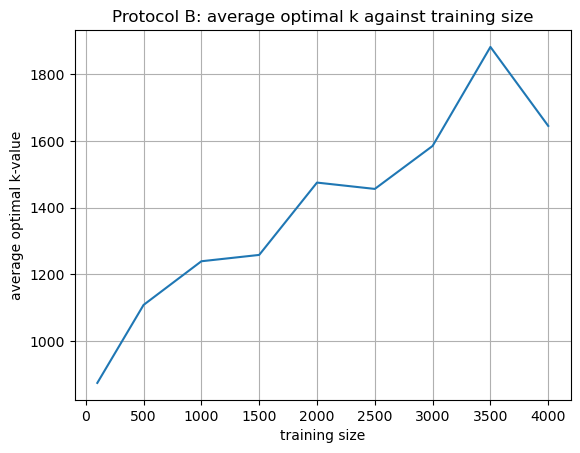

In [17]:
# Plot the results
plt.figure()
plt.plot((100, 500,1000,1500,2000,2500,3000,3500,4000), optimal_k_lists)
plt.xlabel("training size")
plt.ylabel("average optimal k-value")
plt.title("Protocol B: average optimal k against training size")
plt.grid(True)
plt.savefig("Q8.png")
plt.show()

In [18]:
optimal_k_lists

[874.0, 1108.0, 1239.0, 1258.0, 1475.0, 1456.0, 1585.0, 1882.0, 1645.0]

Text(0.5, 0, 'training size')

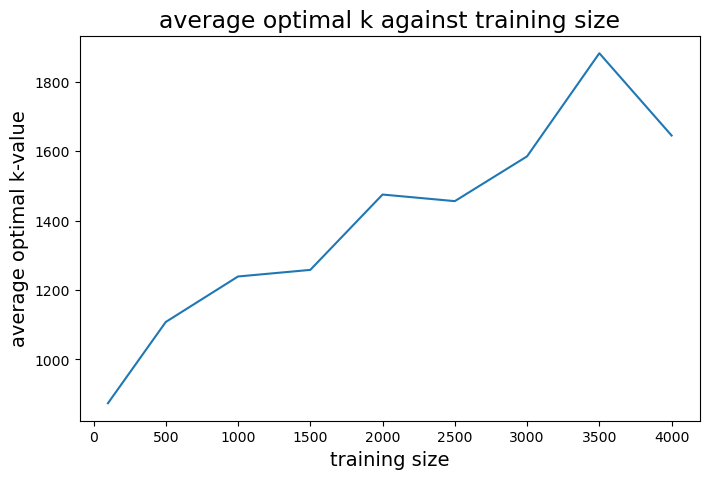

In [14]:

plt.figure(figsize=(8,5))
plt.plot((100, 500,1000,1500,2000,2500,3000,3500,4000), optimal_k_lists)
plt.title('average optimal k against training size',fontsize  = 17)
plt.ylabel('average optimal k-value',fontsize  = 14)
plt.xlabel('training size',fontsize  = 14)